# Índice de Contenido
- [Filtro cubo rubik](#Filtro-cubo-rubik)
- [Filtro pixelado](#filtro-pixelado)
- [Formato Hex a RGB](#pasar-de-formato-hex-a-formato-rgb)
- [Calcular la distancias entre colores](#función-para-calcular-la-distancias-entre-colores)
- [Formato RGB a Hex](#pasar-una-lista-de-colores-rgb-a-una-lista-de-colores-en-hexadecimal)
- [Extraer paleta de colores con k-means](#extraer-una-paleta-de-colores-usando-k-means)
- [Plotear paleta de colores](#plotear-paleta-de-colores-de-una-imagen)
- [Robar paleta de colores](#robar-paleta-de-colores)
- [Convertir PNG a JPG](#función-para-convertir-imagenes-png-a-jpg)
- [Crear clase FiltroRubik](#crear-clase-filtrorubik)
- [Probando filtro](#probando-todos-los-métodos-de-la-clase)

# Filtro cubo rubik

Este proyecto universitario se inspira en retratos creados con cubos Rubik. En este notebook, se explorarán y aplicaran técnicas avanzadas de filtrado de imágenes utilizando las librerías de Python: skimage y numpy.

El objetivo es transformar imágenes ordinarias a retratos que pareciesen construidos con cubos rubiks, elegiendo una paleta de colores. 
 
Con este proyecto se ponen en práctica los conocimientos adquiridos en la asignatura de Procesamiento digital de imágenes impartida en el cuarto semestre de la licenciatura en Inteligencia Artificial en la UAEM.

![Retrato Rubik](retratorubik.jpeg)

In [1]:
#Se importan las librerías necesarias
import skimage as ski
import numpy as np

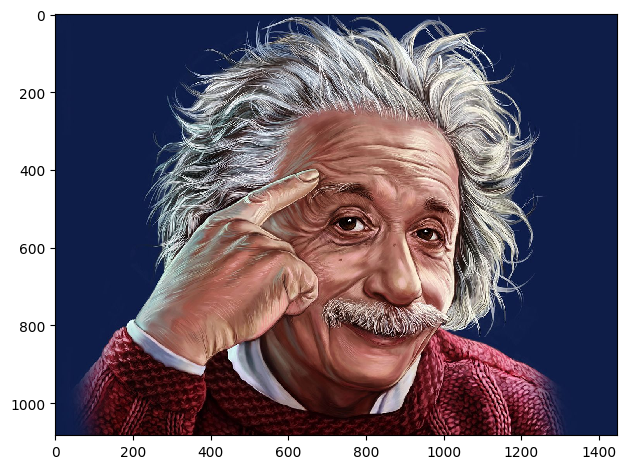

In [2]:
# se carga la imagen de muestra
img = ski.io.imread('Einstein.jpg')
ski.io.imshow(img)

In [3]:
#tamaño de la imagen
print(img.shape)

(1083, 1445, 3)


# Filtro pixelado

Se creará un filtro de pixelado intentando mantener el mismo tamaño de la imagen original. Para ello se elegirá el tamaño l de un lado del cuadrado que será la dimensión (lxl) de los pixeles para el friltro. La imagen original se recorta para que sus dimensiones sean un múltiplo del largo del cuadrado elegido y así no se corten los pixeles al borde de la imagen.  
Se extraerá de la imagen un cuadro de pixeles del tamaño elegido, se calculará la media aritmética (promedio) para ese cuadro y el valor será el color que se le asignará a ese cuadro en la imagen original. Con esto se crearán pixeles del tamaño elegido y se seguirá conservando las dimensiones de la imagen original.

In [4]:
cuadro_size = 10 #dimensiones del cuadro

(1080, 1440, 3)


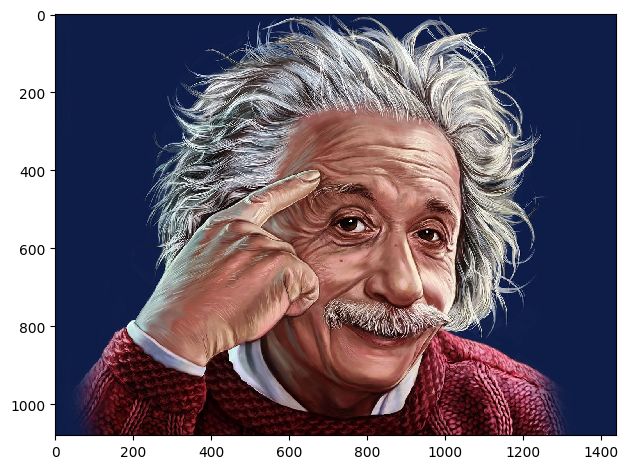

In [5]:
#modificar tamaño de la imagen a un multiplo de cuadro_size
imagen_modificada = img.copy()
imagen_modificada = imagen_modificada[:imagen_modificada.shape[0]//cuadro_size*cuadro_size,:imagen_modificada.shape[1]//cuadro_size*cuadro_size]
print(imagen_modificada.shape)
ski.io.imshow(imagen_modificada)

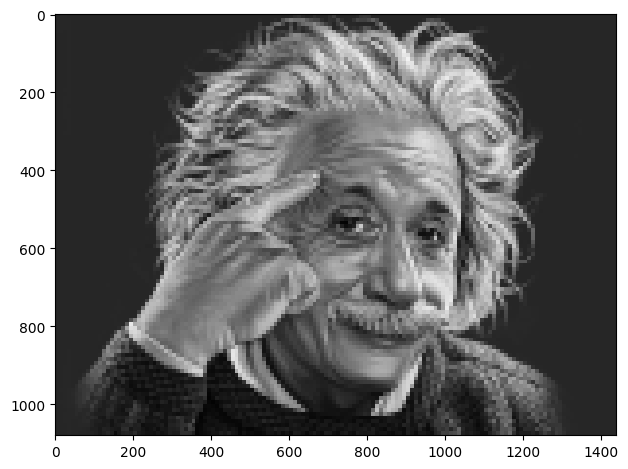

In [6]:
imagen_modificada = img.copy()
imagen_modificada = imagen_modificada[:imagen_modificada.shape[0]//cuadro_size*cuadro_size,:imagen_modificada.shape[1]//cuadro_size*cuadro_size]
# recorrer la imagen por cuadros de tamaño cuadro_size
for i in range(0, imagen_modificada.shape[0], cuadro_size):
    for j in range(0, imagen_modificada.shape[1], cuadro_size):
        cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] #extraer el cudro de la imagen
        mean = np.mean(cuadro) #clcular la media de los colores del cuadro 
        imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = mean #Asignar la media a todos los pixeles del cuadro

ski.io.imshow(imagen_modificada) 

La media aritmética de todos los canales hace que la imagen se vea en blanco y negro. Así que se sacará la media aritmética de cada canal para cada cuadro pixelado.

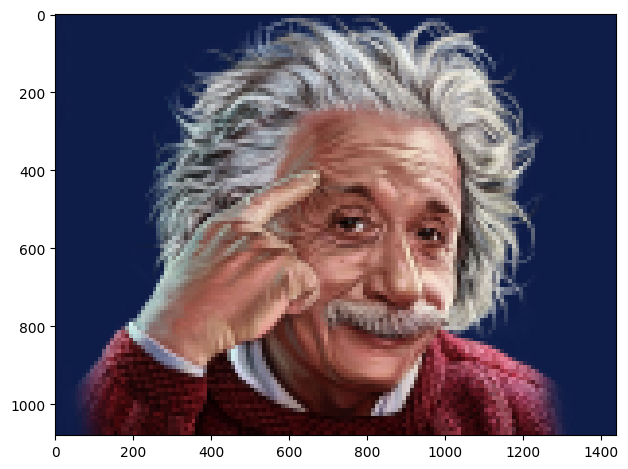

In [7]:
imagen_modificada = img.copy()
imagen_modificada = imagen_modificada[:imagen_modificada.shape[0]//cuadro_size*cuadro_size,:imagen_modificada.shape[1]//cuadro_size*cuadro_size]
# recorrer la imagen por cuadros de tamaño cuadro_size
for i in range(0, imagen_modificada.shape[0], cuadro_size):
    for j in range(0, imagen_modificada.shape[1], cuadro_size):
        cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] #extraer el cudro de la imagen
        mean = np.mean(cuadro, axis=(0, 1)) #clcular la media de los colores del cuadro 
        imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = mean #Asignar la media a todos los pixeles del cuadro

ski.io.imshow(imagen_modificada) 

# Pasar de formato Hex a formato RGB

Se creará una función que recibe una lista de cadenas, cada una representando un valor en formato Hex para los colores deseados. La funcion devolverá una cadena de cadenas con los 3 valores de los canales de los colores (rojo, verde, azul) en formato RGB.  
Esta función se usará para agregar paletas de colores en formato de listas.

In [8]:
#función para convertir colores hexadecimales a RGB
def hex_to_rgb(hexa_colors): # hexa_colors es una lista de colores hexadecimales
    rgb_colors = [] # Inicializar una lista vacía para los colores RGB

    for hexa_color in hexa_colors:  # Iterar sobre los colores hexadecimales
        hexa_color = hexa_color.lstrip('#')  # Eliminar el caracter '#' del color
        rgb_color = [int(hexa_color[i:i+2], 16) for i in (0, 2, 4)] # Convertir el color a RGB
        rgb_colors.append(rgb_color) # Agregar el color a la lista de colores RGB
        
    return rgb_colors # Retornar la lista de colores RGB

Probar función para los colores del cubo rubik
Rojo: HEX: #FF0000, RGB: (255, 0, 0)  
Azul: HEX: #0000FF, RGB: (0, 0, 255)  
Amarillo: HEX: #FFFF00, RGB: (255, 255, 0)  
Blanco: HEX: #FFFFFF, RGB: (255, 255, 255)  
Naranja: HEX: #FFA500, RGB: (255, 165, 0)  
Verde: HEX: #008000, RGB: (0, 128, 0)  

In [9]:
lista_colores_hex = ["#FF0000", "#0000FF", "#FFFF00", "#FFFFFF", "#FFAF00", "#00FF00"]
colores_rubik = hex_to_rgb(lista_colores_hex)
print(colores_rubik)

[[255, 0, 0], [0, 0, 255], [255, 255, 0], [255, 255, 255], [255, 175, 0], [0, 255, 0]]


# Función para calcular la distancias entre colores

Se creará una función que tome dos listas, una será una lista con los 3 valores de los canales RBG de un pixel y la otra lista será una lista de listas que serán colores en RGB. Usando otra función, se calculará la distancia euclideana de ese color y de cada uno de los valores de la lista de colores. La función regresará el color de la lista que tenga la menor distancia al color del pixel.  
Esta función se usará para cambiar los cuadros pixelados de la imagen y reemplazarlos por el color más parecido (cercano) a uno de la lista de colores, la cuál será la paleta de color deseada.

In [10]:
#función para calcular la distancia entre dos colores
def distancia_color(color1, color2):
    return np.sqrt(np.sum([(a - b)**2 for a, b in zip(color1, color2)])) #calcular la distancia euclidiana

#función para encontrar el color más cercano a un color dado
def color_cercano(color, colores):
    return min(colores, key=lambda c: distancia_color(color, c)) #encontrar el color más cercano

In [11]:
color_cercano([128, 128, 128], colores_rubik)

[255, 175, 0]

Se implementan las funciones para crear el filtro de pixelado con la paleta de colores del cubo rubik

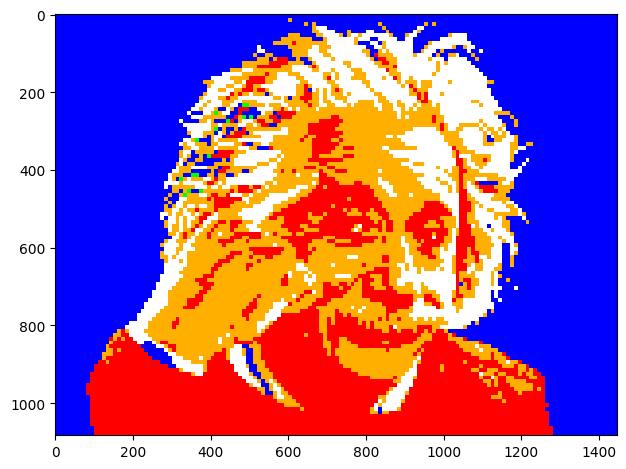

In [12]:
imagen_modificada = img.copy() #crear una copia de la imagen para modificarla

for i in range(0, imagen_modificada.shape[0], cuadro_size):
    for j in range(0, imagen_modificada.shape[1], cuadro_size):
        cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] #extraer el cuadro
        #calcular la media de los valores de los pixeles
        media = np.mean(cuadro, axis=(0,1))
        color_cercano_media = color_cercano(media, colores_rubik) # Encontrar el color más cercano al promedio
        imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = color_cercano_media # Rellenar el cuadro con el promedio

ski.io.imshow(imagen_modificada)

Para no tener colores tan planos, se implementará un poco de ruido en el filtro, haciendo que haya una pequeña probabilidad de que se elija el segundo color más parecido al pixel en lugar de siempre elegir el más parecido, es decir el que tiene la distancia euclideana más pequeña entre los colores de la paleta de colores.

In [13]:
#Función para encontrar el color más cercano a un color dado con una probabilidad del 95%
def color_cercano(color, colores):
    candidatos = colores.copy() 
    candidatos = sorted(candidatos, key=lambda c: distancia_color(color, c), reverse=False)
    if np.random.rand() < 0.95:
        return candidatos[0]
    else: 
        return candidatos[1]

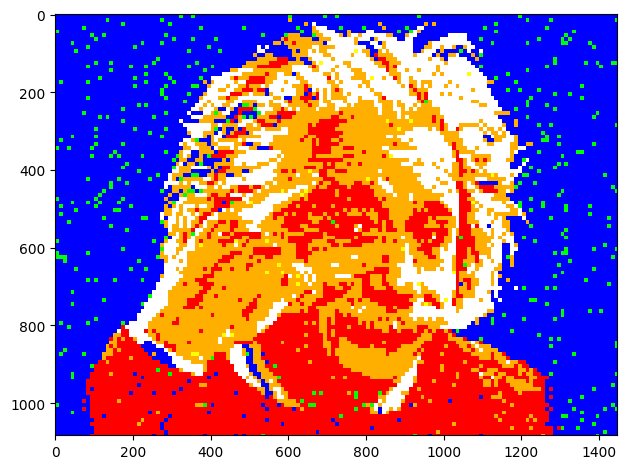

In [14]:
imagen_modificada = img.copy() # Crear una copia de la imagen para modificarla

for i in range(0, imagen_modificada.shape[0], cuadro_size):
    for j in range(0, imagen_modificada.shape[1], cuadro_size):
        cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] # Extraer el cuadro
        #calcular la media de los valores de los pixeles
        media = np.mean(cuadro, axis=(0,1))
        color_cercano_media = color_cercano(media, colores_rubik)
        imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = color_cercano_media # Rellenar el cuadro con el promedio

ski.io.imshow(imagen_modificada)

In [15]:
def filtro(imagen, cuadro_size, lista_colores_hex):
    lista_colores = hex_to_rgb(lista_colores_hex) 
    imagen = ski.io.imread(imagen)
    imagen_modificada = imagen.copy() 

    for i in range(0, imagen_modificada.shape[0], cuadro_size):
        for j in range(0, imagen_modificada.shape[1], cuadro_size):
            cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size]
            media = np.mean(cuadro, axis=(0,1)) 
            color_cercano_media = color_cercano(media, lista_colores) 
            imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = color_cercano_media 
    imagen_modificada = imagen_modificada 
    ski.io.imshow(imagen_modificada) 

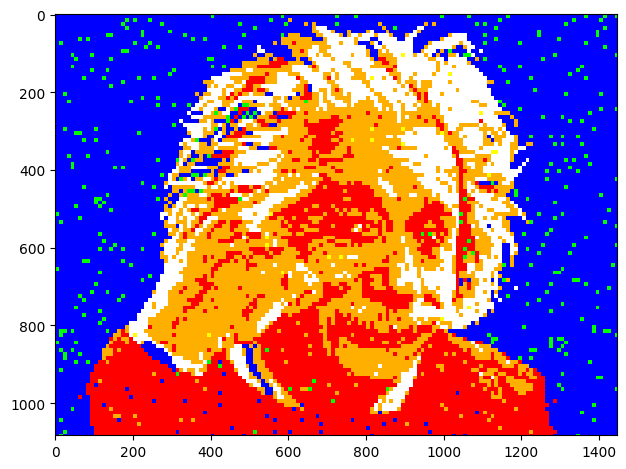

In [16]:
filtro('Einstein.jpg', 10, ["#FF0000", "#0000FF", "#FFFF00", "#FFFFFF", "#FFAF00", "#00FF00"])

# Pasar una lista de colores rgb a una lista de colores en hexadecimal

In [17]:
# pasar de rgb a hex
def rgb_to_hex(rgb_colors):
    hex_colors = [] 
    for rgb_color in rgb_colors: 
        hex_color = '#{:02x}{:02x}{:02x}'.format(*rgb_color) # Convertir el color a hexadecimal
        hex_color = hex_color.upper()
        hex_colors.append(hex_color) 
    return hex_colors 

In [18]:
rgb_to_hex([[165, 105, 95], [15, 29, 71], [222, 217, 213], [187, 163, 159], [105, 63, 62], [123, 122, 127], [51, 13, 14]])

['#A5695F', '#0F1D47', '#DED9D5', '#BBA39F', '#693F3E', '#7B7A7F', '#330D0E']

# Extraer una paleta de colores usando k-means

In [19]:
def extraer_paleta(nombre_imagen, len_paleta):
    from sklearn.cluster import KMeans
    img = ski.io.imread(nombre_imagen)
    imagen_modificada = img.copy() 

    #método kmeans
    kmeans = KMeans(n_init=len_paleta, random_state=14) # Inicializar el modelo KMeans
    imagen_reducida = imagen_modificada.reshape(-1, 3) #convertir la imagen a un arreglo de2 dimensiones
    kmeans.fit(imagen_reducida) 
    centroids = [list(map(int, c)) for c in kmeans.cluster_centers_]
    return centroids

In [20]:
extraer_paleta("Einstein.jpg", 6)

[[15, 29, 71],
 [184, 125, 115],
 [145, 87, 79],
 [226, 220, 216],
 [92, 56, 57],
 [124, 123, 129],
 [49, 12, 13],
 [188, 172, 170]]

In [21]:
def paleta_imagen(imagen, len_paleta):
    colores = extraer_paleta(imagen, len_paleta) #|extraer los colores de la imagen
    paleta = rgb_to_hex(colores) #convertir los colores a hexadecimal
    return paleta

In [22]:
paleta_imagen("Einstein.jpg", 6)

['#0F1D47',
 '#B87D73',
 '#91574F',
 '#E2DCD8',
 '#5C3839',
 '#7C7B81',
 '#310C0D',
 '#BCACAA']

# Plotear paleta de colores de una imagen

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_paleta(imagen, len_paleta):

    #manejo de excepciones
    if len_paleta <= 1:
        raise ValueError("Se necesitan al menos dos colores")
    
    colores_paleta = extraer_paleta(imagen, len_paleta) #extraer los colores de la imagen
    colores_hex = rgb_to_hex(colores_paleta) #convertir los colores a hexadecimal

    n_colores = len(colores_paleta)
    
    #crear figura con subplots en una sola fila y tantas columnas como colores
    fig, axs = plt.subplots(1, n_colores, figsize=(n_colores * 2, 2))

    for i, ax in enumerate(axs):
        ax.imshow(np.full((10, 10, 3), colores_paleta[i], dtype=np.uint8))
        ax.axis('off')
        ax.set_title(colores_hex[i])
    plt.show()

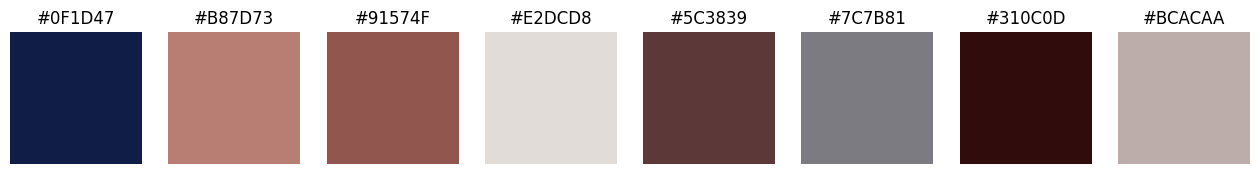

In [24]:
plot_paleta("Einstein.jpg", 7)

# Robar paleta de colores

In [25]:
def robar_paleta(imagen1, imagen2, cuadro_size, len_paleta):
    paleta_robada = paleta_imagen(imagen2, len_paleta)
    filtro(imagen1, cuadro_size, paleta_robada)

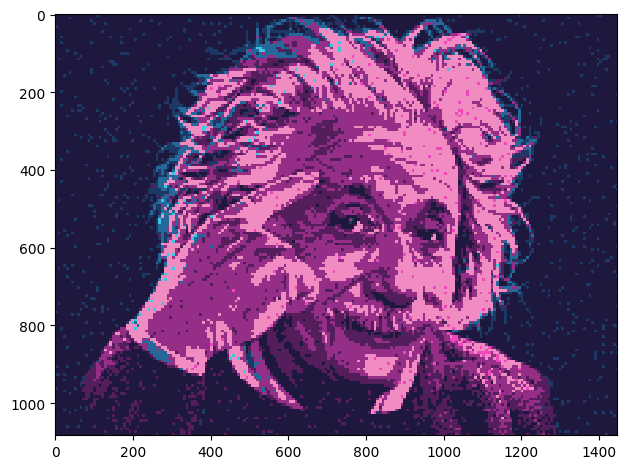

In [26]:
robar_paleta("Einstein.jpg", "paisaje.jpg", cuadro_size=7, len_paleta=6)

In [27]:
robar_paleta("Einstein.jpg", "artspring.png", cuadro_size=5, len_paleta=7)

ValueError: cannot reshape array of size 2375836 into shape (3)

No me había dado cuenta que mi código sólo funciona con imagenes png, por lo que se creará una función para convertir la imagen a jpg si la imagen inicial está en formato png

# Función para convertir imagenes png a JPG

In [28]:
def png_a_jpg(ruta_png):
    from PIL import Image
    
    imagen_png = Image.open(ruta_png)    #abre la imagen png
    imagen_rgb = imagen_png.convert('RGB') #convierte la imagen a RGB
    imagen_rgb.save(ruta_png.replace('.png', '.jpg'), 'JPEG') #guarda la imagen en formato jpg


In [29]:
png_a_jpg("artspring.png")

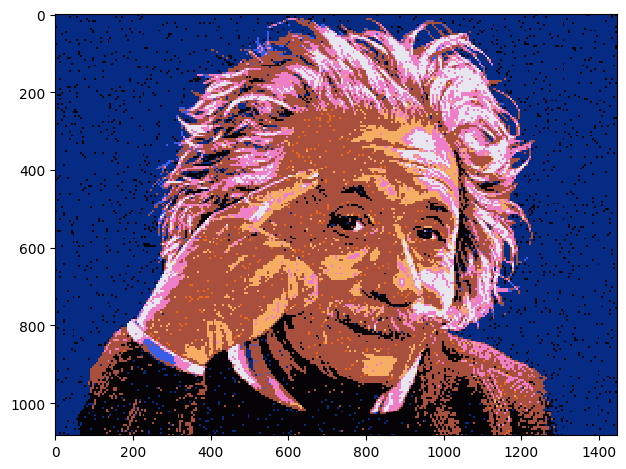

In [30]:
robar_paleta("Einstein.jpg", "artspring.jpg", cuadro_size=5, len_paleta=7)

# Crear clase FiltroRubik

Se creará una clase con todos los métodos necesarios para aplicar el filtro. La clse recibirá como argumentos, el nombre de la imagen, el tamaño del cuadro a pixelar y la paleta de colores que se desea aplicar.

In [39]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

class FiltroRubik:
    """
    Clase para aplicar filtros tipo Rubik a imágenes, extraer paletas de colores y manipular imágenes.

    Atributos:
    ----------
    _paletas : dict
        Diccionario que contiene paletas de colores predeterminadas.
    _imagen_modificada : ndarray
        Imagen modificada después de aplicar el filtro.
    """

    def __init__(self):
        """
        Inicializa la clase con una lista de paletas de colores predeterminadas y una imagen vacia.
        """
        self._paletas = {
            "paleta1": ["#FF0000", "#0000FF", "#FFFF00", "#FFFFFF", "#FFAF00", "#00FF00"],
            "paleta2": ["#98A2EB", "#98EBAD", "#EA999D", "#EBD898", "#967A7C", "#464A6B", "#FFFFFF"],
            "paleta3": ["#D9296A", "#BF2A97", "#C21AD9", "#532259", "#262240"]
        }
        self._imagen_modificada = None


    def _reescale(self, nombre_img, cuadro_size):
        """
        Rescala la imagen de entrada a un tamaño que sea múltiplo de `cuadro_size`.

        Parameters:
        -----------
        nombre_img : str
            La ruta al archivo de imagen de entrada.
        cuadro_size : int
            El tamaño deseado de cada cuadro en la imagen reescalada.

        Returns:
        --------
        ndarray
            La imagen reescalada, con dimensiones que son múltiplos de `cuadro_size`.
        """
        imagen = skimage.io.imread(nombre_img)
        return imagen[:imagen.shape[0] // cuadro_size * cuadro_size, :imagen.shape[1] // cuadro_size * cuadro_size]


    def _hex_to_rgb(self, hex_colores):
        """
        Convierte una lista de colores en formato hexadecimal a formato RGB.

        Parameters:
        -----------
        hex_colores : list
            Lista de colores en formato hexadecimal.

        Returns
        --------
        list
            Lista de colores en formato RGB.
        """
        rgb_colors = []
        for hex_color in hex_colores:
            hex_color = hex_color.lstrip('#')
            rgb_color = [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]
            rgb_colors.append(rgb_color)
        return rgb_colors


    def _rgb_to_hex(self, rgb_colors):
        """
        Convierte una lista de colores en formato RGB a formato hexadecimal.

        Parameters:
        -----------
        rgb_colors : list
            Lista de colores en formato RGB.

        Returns:
        --------
        list
            Lista de colores en formato hexadecimal.
        """
        hex_colors = []
        for rgb_color in rgb_colors:
            hex_color = '#{:02x}{:02x}{:02x}'.format(*rgb_color)
            hex_color = hex_color.upper()
            hex_colors.append(hex_color)
        return hex_colors
    

    def _png_a_jpg(self, ruta_png):
        """
        Convierte una imagen PNG a formato JPG.

        Parameters:
        -----------
        ruta_png : str
            La ruta al archivo de imagen PNG.

        Returns:
        --------
        str
            La ruta al archivo de imagen JPG convertido.
        """
        imagen_png = Image.open(ruta_png)
        imagen_rgb = imagen_png.convert('RGB')
        ruta_jpg = ruta_png.replace('.png', '.jpg')
        #imagen_rgb.save(ruta_jpg, 'JPEG')
        return ruta_jpg


    def _distancia_color(self, color1, color2):
        """
        Calcula la distancia euclidiana entre dos colores.

        Parameters:
        -----------
        color1 : list
            Primer color en formato RGB.
        color2 : list
            Segundo color en formato RGB.

        Returns:
        --------
        float
            La distancia euclidiana entre los dos colores.
        """
        return np.linalg.norm(np.array(color1) - np.array(color2))


    def _color_cercano(self, color, colores):
        """
        Encuentra el color más cercano a un color dado en una lista de colores.

        Paramaters:
        -----------
        color : list
            Color en formato RGB.
        colores : list
            Lista de colores en formato RGB.

        Returns:
        --------
        list
            El color más cercano en formato RGB.
        """
        copia_colores = colores.copy()
        copia_colores = sorted(copia_colores, key=lambda c: self._distancia_color(color, c), reverse=False)
        if np.random.rand() < 0.95:
            return copia_colores[0]
        else:
            return copia_colores[1]


    def _extraer_paleta(self, nombre_imagen, len_paleta):
        """
        Extrae una paleta de colores de una imagen utilizando el algoritmo KMeans.

        Parameters:
        -----------
        nombre_imagen : str
            La ruta al archivo de imagen.
        len_paleta : int
            El número de colores en la paleta.

        Returns:
        --------
        list
            Lista de colores en formato RGB.
        """
        img = skimage.io.imread(nombre_imagen)
        imagen_modificada = img.copy()

        # Método KMeans
        kmeans = KMeans(n_init=len_paleta, random_state=14)
        kmeans.fit(imagen_modificada.reshape(-1, 3))
        centroids = [list(map(int, c)) for c in kmeans.cluster_centers_]
        return centroids


    def paleta_imagen(self, imagen, len_paleta):
        """
        Extrae una paleta de colores de una imagen y la convierte a formato hexadecimal.

        Parameterx:
        -----------
        imagen : str
            La ruta al archivo de imagen.
        len_paleta : int
            El número de colores en la paleta.

        Returns:
        --------
        list
            Lista de colores en formato hexadecimal.
        """
        if imagen.endswith('.png'):
            imagen = self._png_a_jpg(imagen)
        colores = self._extraer_paleta(imagen, len_paleta)
        paleta = self._rgb_to_hex(colores)
        return paleta


    def plot_paleta(self, imagen, len_paleta):
        """
        Muestra una paleta de colores extraída de una imagen.

        Parameters:
        -----------
        imagen : str
            La ruta al archivo de imagen.
        len_paleta : int
            El número de colores en la paleta.

        Returns:
        ------
        ValueError
            Si `len_paleta` es menor o igual a 1.
        """
        # Manejo de excepciones
        if len_paleta <= 1:
            raise ValueError("Se necesitan al menos dos colores")

        if imagen.endswith('.png'):
            imagen = self._png_a_jpg(imagen)

        colores_paleta = self._extraer_paleta(imagen, len_paleta)
        colores_hex = self._rgb_to_hex(colores_paleta)

        n_colores = len(colores_paleta)

        # Crear figura con subplots en una sola fila y tantas columnas como colores
        fig, axs = plt.subplots(1, n_colores, figsize=(n_colores * 2, 2))

        for i, ax in enumerate(axs):
            ax.imshow(np.full((10, 10, 3), colores_paleta[i], dtype=np.uint8))
            ax.axis('off')
            ax.set_title(colores_hex[i])
        plt.show()


    def robar_paleta(self, imagen1, imagen2, cuadro_size, len_paleta):
        """
        Aplica un filtro a una imagen utilizando una paleta de colores extraída de otra imagen.

        Parameters:
        -----------
        imagen1 : str
            La ruta al archivo de la imagen a la que se aplicará el filtro.
        imagen2 : str
            La ruta al archivo de la imagen de la que se extraerá la paleta de colores.
        cuadro_size : int
            El tamaño de cada cuadro en la imagen filtrada.
        len_paleta : int
            El número de colores en la paleta.
        """
        if imagen1.endswith('.png'):
            imagen1 = self._png_a_jpg(imagen1)
        if imagen2.endswith('.png'):
            imagen2 = self._png_a_jpg(imagen2)
        paleta_robada = self.paleta_imagen(imagen2, len_paleta)
        self.filtro(imagen1, cuadro_size, paleta_robada)
    

    def filtro(self, imagen, cuadro_size, paleta=None):
        """
        Aplica un filtro tipo Rubik a una imagen.

        Parameters:
        -----------
        imagen : str
            La ruta al archivo de imagen.
        cuadro_size : int
            El tamaño de cada cuadro en la imagen filtrada.
        paleta : list or str, opcional
            La paleta de colores a utilizar. Puede ser una lista de colores en formato hexadecimal o el nombre de una paleta predeterminada.

        Returns:
        ------
        ValueError
            Si `paleta` no es una lista o una cadena.
        """
        if imagen.endswith('.png'):
            imagen = self._png_a_jpg(imagen)

        imagen = self._reescale(imagen, cuadro_size)
        
        # Paleta por default si no se asigna ninguna
        if paleta is None:
            lista_colores_hex = self._paletas['paleta1']
        # Asignar alguna de las paletas de la clase
        elif isinstance(paleta, str):
            lista_colores_hex = self._paletas[paleta]
        # Usar paleta si se da una lista de colores
        elif isinstance(paleta, list):
            lista_colores_hex = paleta
        else:
            raise ValueError("El argumento 'paleta' debe ser una lista o una cadena.")
        
        lista_colores = self._hex_to_rgb(lista_colores_hex)
        imagen_modificada = imagen.copy()

        for i in range(0, imagen_modificada.shape[0], cuadro_size):
            for j in range(0, imagen_modificada.shape[1], cuadro_size):
                cuadro = imagen_modificada[i:i+cuadro_size, j:j+cuadro_size]
                media = np.mean(cuadro, axis=(0, 1))
                color_cercano_media = self._color_cercano(media, lista_colores)
                imagen_modificada[i:i+cuadro_size, j:j+cuadro_size] = color_cercano_media
        
        self._imagen_modificada = imagen_modificada


    def show(self):
        """
        Muestra la imagen modificada.

        Returns:
        ------
        ValueError
            Si no se ha aplicado ningún filtro.
        """
        if self._imagen_modificada is not None:
            skimage.io.imshow(self._imagen_modificada)
            plt.show()
        else:
            raise ValueError("No se ha aplicado ningún filtro. Use el método 'filtro' primero.")


    def guardar(self, filename=None):
            """
            Guarda la imagen modificada en un archivo.

            Parameters:
            - filename: str, opcional. El nombre del archivo en el que se guardará la imagen modificada.
                        Si no se proporciona un nombre, se utilizará 'imagen_modificada.jpg' por defecto.
            """
            if self._imagen_modificada is None:
                raise ValueError("No se ha aplicado ningún filtro. Use el método 'filtro' primero.")
            if filename is None:
                filename = 'imagen_modificada.jpg'  # Si no se agrega un nombre a la imagen, nombrarla por default
            skimage.io.imsave(filename, self._imagen_modificada)


# Probando todos los métodos de la clase

In [32]:
#crear una instancia de la clase
filtro_rubik = FiltroRubik()

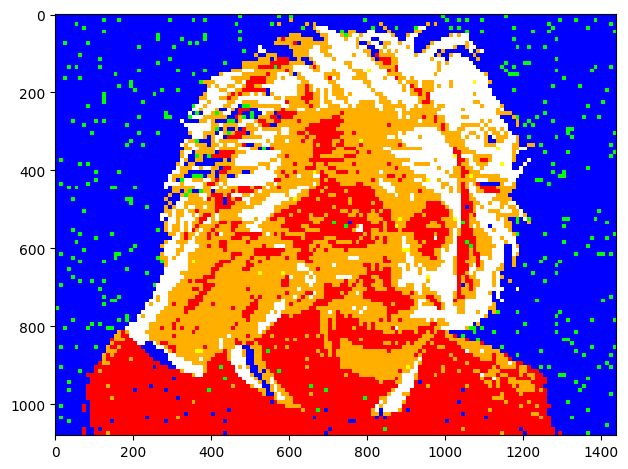

In [33]:
filtro_rubik.filtro("Einstein.jpg", 10) #sólo imagen y tamaño cuadrado
filtro_rubik.show()

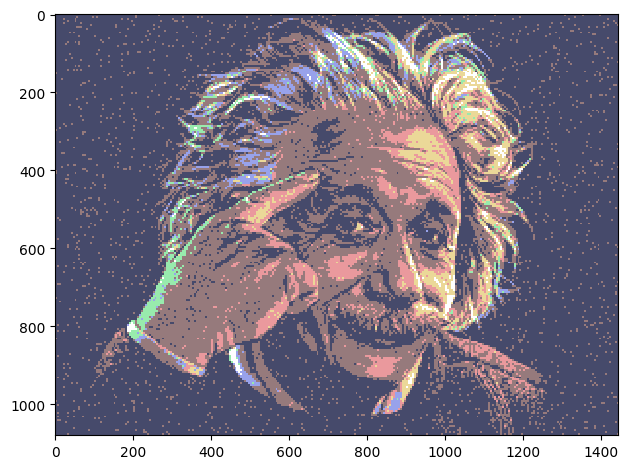

In [34]:
filtro_rubik.filtro('Einstein.jpg', 5, "paleta2") #probando con paleta integrada
filtro_rubik.show()

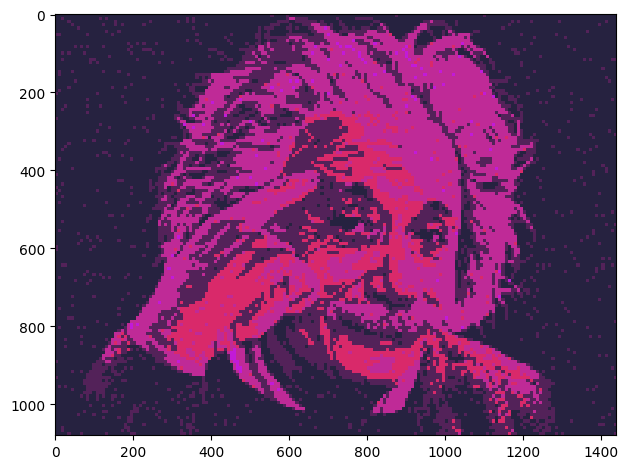

In [35]:
filtro_rubik.filtro('Einstein.jpg', 8, "paleta3")
filtro_rubik.show()
filtro_rubik.guardar('Einstein_filtro3.jpg') #probando método guardar

In [36]:
filtro_rubik.paleta_imagen("Einstein.jpg", 6) #obtener paleta de colores

['#0F1D47',
 '#B87D73',
 '#91574F',
 '#E2DCD8',
 '#5C3839',
 '#7C7B81',
 '#310C0D',
 '#BCACAA']

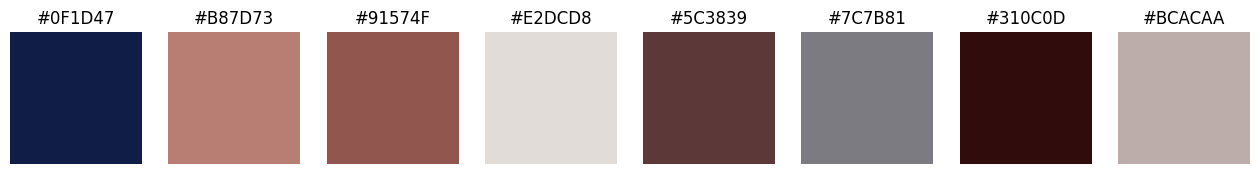

In [37]:
filtro_rubik.plot_paleta("Einstein.jpg", 6) #plotea paleta de colores

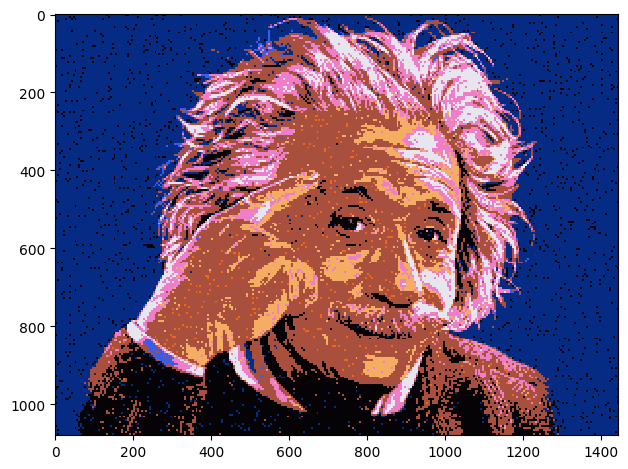

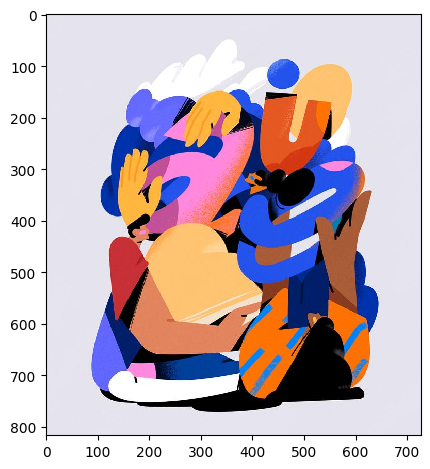

In [38]:
#obtieniendo paleta de una imagen a otra
filtro_rubik.robar_paleta("Einstein.jpg", "artspring.png", cuadro_size=5, len_paleta=7)
filtro_rubik.show()
filtro_rubik.guardar('Einstein_artspring.jpg')

skimage.io.imshow('artspring.jpg') #Esta es la imagen a la que se le robó la paleta